In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.11'

In [22]:
# Calculate spectral res to help match table
1813.22-1812.6


0.6200000000001182

In [23]:

1785.95-1785.33

0.6200000000001182

In [24]:
df=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx',
                          sheet_name='Bakker_drift_with_spectrometer')


df_Merge=df.loc[df['first'].between(700, 800)]
df_Merge.head()
df_Merge.sort_values(by='first', ascending=True, inplace=True)


C:\Users\penny\AppData\Local\Temp\ipykernel_30732\3503134931.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Merge.sort_values(by='first', ascending=True, inplace=True)


## It is confusing what data Bakker sent, given it doesnt match the spectral resolution show
- Used webplotdigitizer to get the data from the main text Fig. 18 to see if he used the range or the standard deviation. The range is 0.1, the standard deviation is 0.03, the only thing that matches his 0.13 is the error bar, so he's saying the error on the individual measurement is 0.13. 
- Seems to be the step of the x position. 

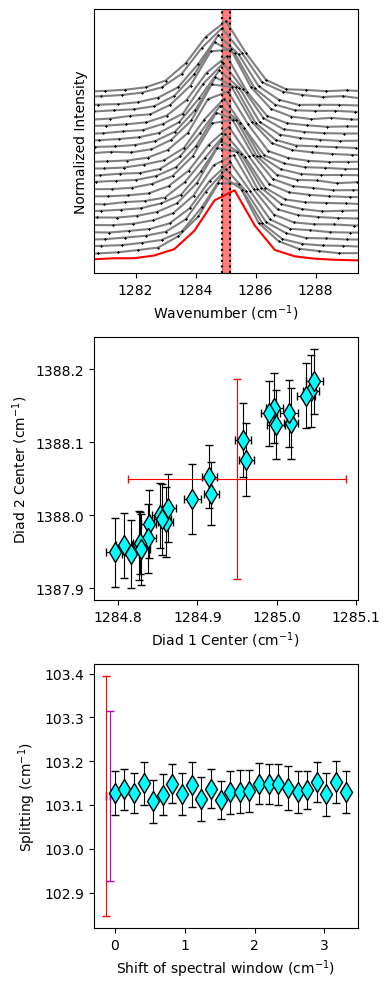

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4,10))


Diad_Files = df_Merge['filename'] + '.txt'
lins = np.linspace(0, len(Diad_Files), len(Diad_Files))



i = 0
for file in Diad_Files:
    d = pf.get_data(path=spectra_path, filetype=filetype, filename=file)
    xlim1 = 1280
    xlim2 = 1290
    x_plot = d[:, 0][(d[:, 0] > xlim1) & (d[:, 0] < xlim2)]
    y_plot = d[:, 1][(d[:, 0] > xlim1) & (d[:, 0] < xlim2)]
    
    Diff = (np.max(y_plot) - np.min(y_plot)) * 0.1
    if i==0:
        ax1.plot(x_plot, ((y_plot - np.min(y_plot)) / Diff) + i, '-', color='red')

    else:
        ax1.plot(x_plot, ((y_plot - np.min(y_plot)) / Diff) + i, '-', color='grey')
        ax1.plot(x_plot, ((y_plot - np.min(y_plot)) / Diff) + i, 'xk', ms=1, zorder=100)
    i += 1

offset = 0.6
ax1.set_xlim([xlim1 + offset, xlim2 - offset])

# Adding the vertical lines and grey box on ax1
ax1.axvline(x=1285 - 0.137, linestyle=':', color='k')
ax1.axvline(x=1285 + 0.137, linestyle=':', color='k')

start = 1285 - 0.137
end = 1285 + 0.137
ax1.axvspan(start, end, color='red', alpha=0.5)  # Adjust alpha for transparency


ax2.errorbar(x=df_Merge['Diad1_Combofit_Cent'], y=df_Merge['Diad2_Combofit_Cent'], 
             xerr=df_Merge['Diad1_cent_err'], yerr=df_Merge['Diad2_cent_err'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=3)

ax2.errorbar(x=1284.95,
              y=1388.05, 
             xerr=0.137, yerr=0.137,
fmt='d', ecolor='r', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=3)


ax3.errorbar(x=df_Merge['first']-df_Merge['first'].iloc[0], y=df_Merge['Splitting'], 
             xerr=0, yerr=df_Merge['Split_σ'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=3)

# ax2.errorbar(x=103.123, y=103.123, 
#              xerr=0.262, yerr=0.262,
#              fmt='d', ecolor='red', elinewidth=0.8, mfc='red', ms=10, mec='k', capsize=3)

ax3.errorbar(x=-0.13,
              y=103.12, 
             xerr=0, yerr=0.137*2,
fmt='d', ecolor='r', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=3)

ax3.errorbar(x=-0.07,
              y=103.12, 
             xerr=0, yerr=(0.137**2+0.137**2)**0.5,
fmt='d', ecolor='m', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=3)

ax2.set_xticks([1284.8, 1284.9, 1285, 1285.1])
ax2.set_yticks([1387.9, 1388, 1388.1, 1388.2])
ax1.set_yticks([])
ax1.set_ylabel('Normalized Intensity')
ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
ax2.set_xlabel('Diad 1 Center (cm$^{-1}$)')
ax2.set_ylabel('Diad 2 Center (cm$^{-1}$)')

ax3.set_xlabel('Shift of spectral window (cm$^{-1}$)')
ax3.set_ylabel('Splitting (cm$^{-1}$)')

fig.tight_layout()
fig.savefig('Spectral_Shifting.png', dpi=200)
